# Task03 - 布局格式定方圆

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 1. 子图

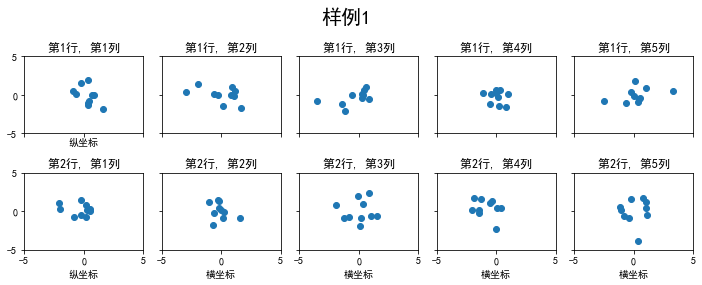

In [4]:
# 1.plt.subplots()-均匀状态的子图
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行, 第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_xlabel('纵坐标')
fig.tight_layout() # tight_layout会自动调整子图参数，使之填充整个图像区域。

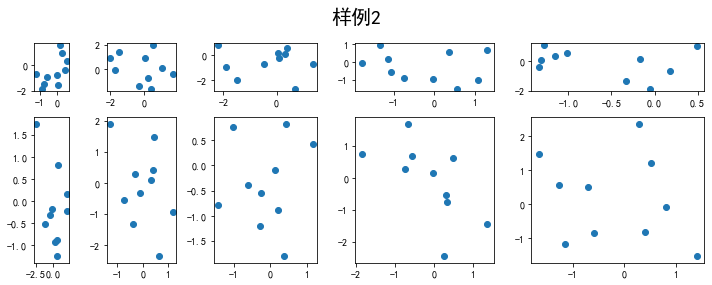

In [8]:
# 2.GridSpec-非均匀子图
# 2.1 图的比例不同
fig = plt.figure(figsize=(10, 4)) 
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3]) # 相对宽度比例
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j]) 
        ax.scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行, 第%d列'%(i+1,j+1))
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_xlabel('纵坐标')
fig.tight_layout()

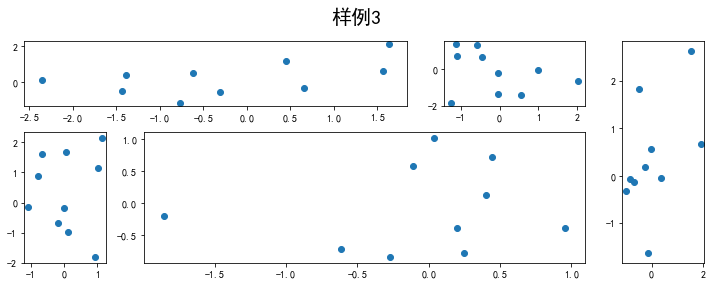

In [12]:
# 2.2 跨行或跨列
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3',size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

In [14]:
# 作业1：墨尔本1981年至1990年的每月温度情况
ex1 = pd.read_csv('C:/Users/26460/Desktop/fantastic-matplotlib/layout_ex1.csv')
ex1.head()

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323


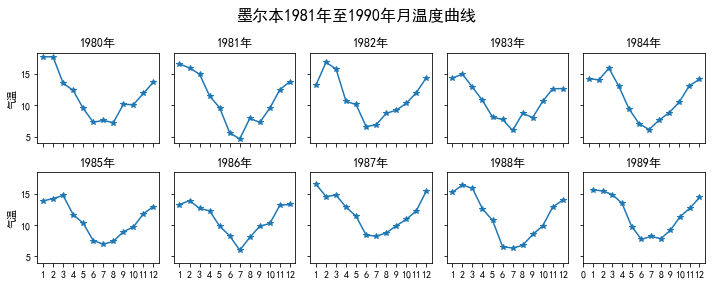

In [34]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('墨尔本1981年至1990年月温度曲线', size=16)
ex1['year'] = pd.to_datetime(ex1['Time']).dt.year
ex1['month'] = pd.to_datetime(ex1['Time']).dt.month
for i in range(2):
    for j in range(5):
        temp = ex1[ex1['year'] == i*5+j+1981]
        axs[i][j].plot(temp['month'], temp['Temperature'], marker='*')
        axs[i][j].set_title('%d年'%(i*5+j+1980))
        axs[i][j].set_xticks(range(13))
        if j==0: axs[i][j].set_ylabel('气温')
fig.tight_layout() # tight_layout会自动调整子图参数，使之填充整个图像区域。

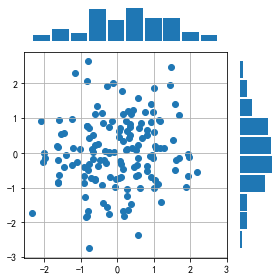

In [60]:
# 作业2：数据的散点图和边际分布
x, y = np.random.randn(2, 150)
# 2.1 
fig = plt.figure(figsize=(4,4)) 
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[3,0.5], height_ratios=[0.5,3]) # 相对宽度比例
plt.axis('off')
ax = fig.add_subplot(spec[0, 0]) 
ax.hist(x, rwidth=0.9)
ax.axis('off')
ax = fig.add_subplot(spec[1, 0]) 
ax.scatter(x, y)
ax.set_xticks(range(-2,4))
ax.grid(True)
ax = fig.add_subplot(spec[1, 1]) 
ax.hist(y, orientation='horizontal', rwidth=0.9)
plt.axis('off')
fig.tight_layout()